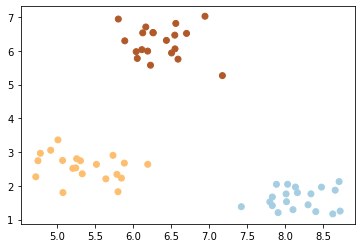

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
%matplotlib inline

# 读取数据
from tools.datasets import DataGenerator
data_generator=DataGenerator(p=3, sep=8, seed=8215)
data,label=data_generator.get_data()
data_generator.plot()

## Test Field

Applying: NewtonCG
iter:220	d_norm:0.6715	re:0.00001
Complete!
--------
Result
--------
+ Model: Weighted
  - lambda:                      2
  - delta:                    0.01
  - k:                          25
  - v:                         0.5
+ Minimizer: NewtonCG
  - Max Iteration:             inf
  - Tolerance:               1e-05
  - cg max:                     10
  - gamma:                    0.01
  - sigma:                     0.5
+ Performance:
  - Data Shape:             2 x 60
  - Iteration Times:           220
  - Duration:               1.881s
  - Number of Clusters:          3
  - Number of Classes:           3
  - Compression Ratio:       0.913
  - Homogeneity:             1.000
  - Completeness:            1.000
  - V-measure(beta=1):       1.000


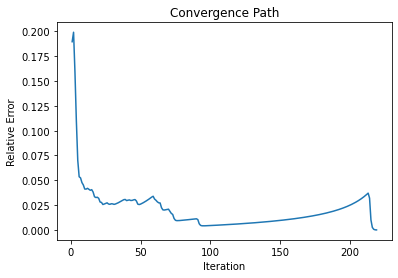

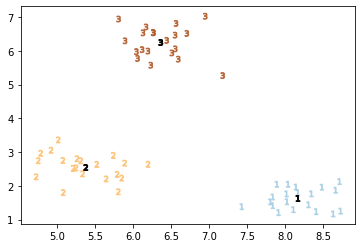

In [2]:
# set parameters
general_param={
    'data':data,
    'lambda_': 2
}

model_param={
    'model':'Weighted',
    'delta': 0.01,
    'k':25,
    'v':0.5
}

minimizer_param={
    'minimizer': 'NewtonCG',
    'tol': 10**(-5),
    'cg_max': 10,
    'gamma': 0.01,
    'sigma': 0.5
}

# load model
from tools.full_model import MyCluster
my_cluster=MyCluster(**general_param,**model_param,**minimizer_param)

# apply optimization
my_cluster.optimize()

# get clustering result with epsilon
my_cluster.solution_to_cluster(epsilon=0.01)

# get result panel
my_cluster.get_result_panel(label,beta=1)

# visualization of clustering result (self-generated data)
my_cluster.plot2d(data_generator)


## 说明

### 生成数据
- `p`:控制类个数
- `sep`: 控制各类的分离程度
- `seed`: 随机数种子

In [1]:
from tools.datasets import DataGenerator
data_generator = DataGenerator(p=3, sep=10, seed=10)
data, label = data_generator.get_data()
data_generator.plot()

### 加载数据
- `wine`: 13 x 178
- `vowel`: 10 x 528
- `segment`: 19 x 230
- `mnist`: 784 x 60000

In [ ]:
from tools.datasets import load_data
data,label=load_data('vowel')

### 通用参数

In [4]:
general_param={
    'data':data,
    'lambda_':2
}

### 模型参数

- `Huber-type`

In [ ]:
model_param={
    'model':'Huber-type',
    'delta': 0.01
}

- `Weighted`

In [ ]:
model_param={
    'model':'Weighted',
    'delta': 0.01,
    'k':21,
    'v':0.5
}

- `L1`

In [ ]:
model_param={
    'model':'L1'
}

- `Linf`

In [ ]:
model_param={
    'model':'Linf'
}

- others

### 优化器参数

- `AGM`

In [ ]:
model_param={
    'model':'Linf'
}

model_param={
    'model':'L1'
}
model_param={
    'model':'WeightedLinf',
    'k':20,
    'v':0.5
}
model_param={
    'model':'WeightedLinf',
    'k':20,
    'v':0.5
}
model_param={
    'model':'L2'
}
model_param={
    'model':'L2s'
}

model_param={
    'model':'LogSmoothing'
}

- `NewtonCG`

In [ ]:
minimizer_param={
    'minimizer': 'NewtonCG',
    'tol': 10**(-4),
    'cg_max': 10,
    'gamma': 0.01,
    'sigma': 0.5
}

- `LBFGS`

In [ ]:
minimizer_param={
    'minimizer': 'LBFGS',
    'tol': 10**(-4),
    's': 1,
    'm': 20,
    'gamma': 0.1,
    'sigma': 0.5,
    'max_line_search_iter': 10
}

- `SGD`

In [ ]:
minimizer_param={
    'minimizer': 'SGD',
    'tol': 10**(-4),
    'batch_size': 40
}